# Imports

In [1]:
import bs4 as bs
import requests
import yfinance as yf
import datetime
import numpy as np
import plotly.express as px

# Load Data

In [2]:
sp500 = yf.download('^GSPC')

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2021-03-22,3916.479980,3955.310059,3914.159912,3940.590088,3940.590088,4311380000
2021-03-23,3937.600098,3949.129883,3901.570068,3910.520020,3910.520020,4645340000
2021-03-24,3919.929932,3942.080078,3889.070068,3889.139893,3889.139893,4766990000


In [4]:
sp500['Change'] = 0.
sp500['PctChange'] = 0.

for i in range(len(sp500)):
    try:
        sp500.Change[i+1] = sp500.Close[i+1]-sp500.Close[i]
        sp500.PctChange[i+1] = sp500.Close[i+1]/sp500.Close[i]
    except:
        break
        
sp500 = sp500[['Close', 'Change', 'PctChange']]

<ipython-input-4-dbba0a77dc74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500.Change[i+1] = sp500.Close[i+1]-sp500.Close[i]
<ipython-input-4-dbba0a77dc74>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500.PctChange[i+1] = sp500.Close[i+1]/sp500.Close[i]


In [5]:
sp500.tail()

,Close,Change,PctChange
Date,,,
2021-03-22,3940.590088,27.489990,1.007025
2021-03-23,3910.520020,-30.070068,0.992369
2021-03-24,3889.139893,-21.380127,0.994533
2021-03-25,3909.520020,20.380127,1.005240
2021-03-26,3974.540039,65.020020,1.016631


Check against latest data: [Link](https://www.google.com/search?q=sp500&sxsrf=ALeKk03VXYsNX01lukedSL1X8A6TOddfpQ%3A1616963979720&ei=i-lgYIa5K83t5gKizau4DQ&oq=sp500&gs_lcp=Cgdnd3Mtd2l6EAMyBAgjECcyBAgjECcyBwgAELEDEEMyBAgAEEMyBAgAEEMyBAgAEEMyBwgAELEDEEMyCggAEIcCELEDEBQyAggAMgQIABBDOgcIABBHELADUMg4WMg4YPE5aAFwAngAgAHPAYgBtwKSAQUwLjEuMZgBAKABAaoBB2d3cy13aXrIAQjAAQE&sclient=gws-wiz&ved=0ahUKEwjGqoCd7NPvAhXNtlkKHaLmCtcQ4dUDCA0&uact=5)


In [24]:
# get current value
sp_current = sp500.Close[-1]

In [25]:
sp_current

3974.5400390625

# Models

## Monthly

Deposit 100/month in s&p 500 from 1980 onward

How much would you have today...

**Strategy**

- Find the value of s&p for first day of each month of trading (e.g. Jan 1 1980)
- Find % change between Jan 1 1980 and today
- Mulitply by $100
- Append this to list/array
- Repeat for all months
- Sum list/array

In [7]:
# select 1980 onwards
sp500 = sp500.loc['1980-01-01':]
sp500.head(2)

,Close,Change,PctChange
Date,,,
1980-01-02,105.760002,-2.180000,0.979804
1980-01-03,105.220001,-0.540001,0.994894


In [8]:
# select 1st date of each month
sp500.index.min()

Timestamp('1980-01-02 00:00:00')

In [9]:
sp500.loc['1980-01-01':'1980-02-01'].index.min()


Timestamp('1980-01-02 00:00:00')

In [10]:
dates = []

for date in sp500.index.to_period('m').unique():
    dates.append(date)

In [11]:
str(dates[0])

'1980-01'

In [12]:
idx = []

for i in range(1,len(dates)):
    start = str(dates[i-1])+'-01'
    finish = str(dates[i])+'-01'
    first = sp500.loc[start:finish].index.min()
    idx.append(first)

In [13]:
months = sp500.loc[idx]
months.head()

,Close,Change,PctChange
Date,,,
1980-01-02,105.760002,-2.180000,0.979804
1980-02-01,115.120003,0.959999,1.008409
1980-03-03,112.500000,-1.160004,0.989794
1980-04-01,102.180000,0.090004,1.000882
1980-05-01,105.459999,-0.830002,0.992191


In [14]:
months.apply(lambda x: (sp_current/x.Close) * 100, axis=1).sum()

433293.1731123051

In [15]:
len(months) * 100

49400

## Wait Until Drop

In [26]:
dates = sp500.index

In [27]:
drop_amounts = np.linspace(0.4,1.,num=30)

In [28]:
drop_amounts

array([0.4       , 0.42068966, 0.44137931, 0.46206897, 0.48275862,
       0.50344828, 0.52413793, 0.54482759, 0.56551724, 0.5862069 ,
       0.60689655, 0.62758621, 0.64827586, 0.66896552, 0.68965517,
       0.71034483, 0.73103448, 0.75172414, 0.77241379, 0.79310345,
       0.8137931 , 0.83448276, 0.85517241, 0.87586207, 0.89655172,
       0.91724138, 0.93793103, 0.95862069, 0.97931034, 1.        ])

In [29]:
total_earnings = []

for drop_amount in drop_amounts:
    funds = 100
    earnings = []

    for i in range(1,len(dates)):
        # if new month add 100 to funds
        if dates[i-1].month != dates[i].month:
            funds+=100

        # if PctChange < drop_amount multiply funds * sp_current/Close
        if sp500.loc[dates[i], 'PctChange']<=drop_amount:
            total = funds * (sp_current/sp500.loc[dates[i], 'Close'])
            earnings.append(total)
            funds=0
    total_earnings.append(sum(earnings))

In [30]:
total_earnings

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 166165.61544077634,
 166165.61544077634,
 166165.61544077634,
 166165.61544077634,
 230960.7502878765,
 279372.87337479345,
 299425.6225713918,
 301911.0981808925,
 404035.2778082072,
 433020.3658165923]

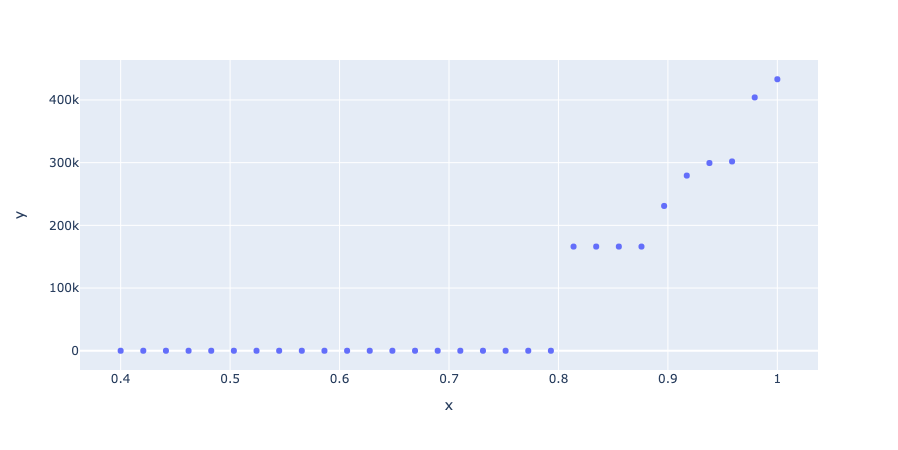

In [31]:
fig = px.scatter(x=drop_amounts, y=total_earnings)
fig.show()